## This notebook outlines the functionality of dae_cpd.py which used a deep autoencoder for learning feaure representation that are useful for change-point detection in data

In [17]:
import numpy as np
import scipy.io as sio

import dae_cpd as dae_cpd

## First, need to load data

In [18]:
dataset = sio.loadmat('./data/beedance.mat')

In [19]:
X = dataset['Y']           ## X:data, shape ==> (n_samples, n_features)
Y = dataset['L'].flatten() ## Y: Labels, shape ==> n_samples, 1
#T, D = X.shape

## Fit model
### By design, model is fitted with first 60% of data, the rest remain as test set

Here is the list of arguments that can be used when fitting the model:

- **window_size**: default to 25
- **trn_ratio**: % of data to be used for fitting (training), default to 0.60 (60%)
- **val_ratio**: % of data to be used for testing, default to 0.80, meaning last 20% will be used for testing
- **z_dim** : encoding dimension, default to 3
- **epochs**: number of epochs for optimization process, default to 1000
- **batch_size**: default to 128
- **learning_rate**: default to 1e-5
- **beta**: weighting factor for MMD loss, default to 1

In [20]:
model = dae_cpd.dae(X, Y).fit()

Length of dataset: 1057 Number of variables: 3 First index of validation set: 635 First index of test set: 846
Model Creation Complete!


## Two methods for change point detection result
- **predict**: change point results using fitted model on unseen test data set only
- **fit_predict**: change point results using fitted model on entire data set 

In [21]:
result = model.fit_predict()
print(result)   # change point indexes

[ 65 140 230 326 444 548 648 776 874 937]


## For visualization, we use signal (X), true chnage point indexes and predicted chnage point indexes

In [22]:
## getting true change point indexes
true_pts = np.where(Y==1)[0]
#len(true_pts)

(<Figure size 720x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2c44cd10>,
       dtype=object))

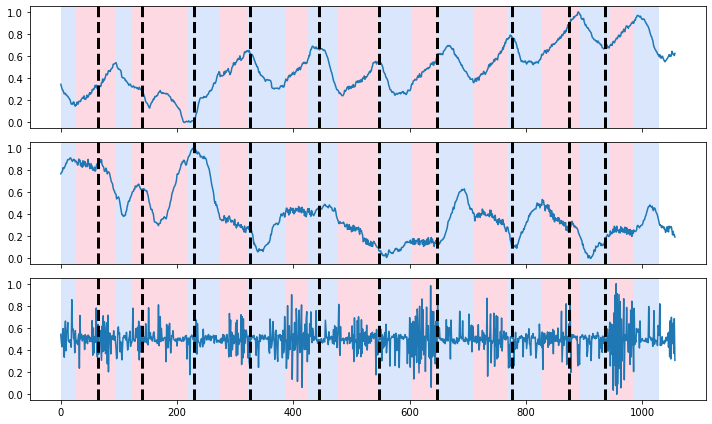

In [23]:
model.display(X, true_pts, result)